In [1]:
## ************ Importation des libraries ******************
import pandas as pd ##une librarie d'analyse et manipulation de données
import numpy as np ##librairie destinée à l'analyse et manipulation des matrices et des tableaux multidimentionnels
import matplotlib.pyplot as plt ## librarie pour la représentation graphique 
import math
## la librairie de sklearn est destinée à l'apprentissage automatique 
from sklearn.model_selection import train_test_split ##ceci est pour la division du dataset en un training set et un testing set
from sklearn.model_selection import cross_validate ##ceci est utilisé pour faire de la cross validation
from sklearn.model_selection import GridSearchCV ##ceci est utilisé pour faire le hyperparameters tuning
from sklearn import metrics ## les différents metriques qu'on va utiliser pour mesurer la performance de nos modèles 
import joblib  ##librarie pour la transformation des modèles en des fichiers .pkl pour les exploiter dans le site web
from sklearn.metrics import plot_confusion_matrix ## pour mesurer la qualité des modèles de classification

In [2]:
#lecture du dataset en dataframe
df = pd.read_csv('df_class1.csv')
df=df.drop(df.columns[0], axis=1)
#garder juste les features qu'on va se baser sur pour faire notre prédiction
df = df[['failures', 'absences', 'schoolsup', 'Mjob', 'reason', 'guardian','paid', 'Fedu', 'goout', 'studytime','traveltime','pass']]

In [3]:
# division du dataframe en features stockés sur X, et le target est stocké sur y 
X= df.drop(["pass"], axis=1)
y= df["pass"]

In [4]:
X

,failures,absences,schoolsup,Mjob,reason,guardian,paid,Fedu,goout,studytime,traveltime
0,0,6,1,0,0,0,0,4,4,2,2
1,0,4,0,0,0,1,0,1,3,2,1
2,3,10,1,0,3,0,1,1,2,2,1
3,0,2,0,3,1,0,1,2,2,3,1
4,0,4,0,4,1,1,1,3,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
390,2,11,0,1,0,2,1,2,4,2,1
391,0,3,0,1,0,0,0,1,5,1,2
392,3,3,0,4,0,2,0,1,3,1,1
393,0,0,0,1,0,0,0,2,1,1,3


In [5]:
y

0      0
1      0
2      0
3      1
4      0
      ..
390    0
391    1
392    1
393    1
394    0
Name: pass, Length: 395, dtype: int64

In [6]:
# matrice de correlation pour voir la dependence entre les features et le target 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,failures,absences,schoolsup,Mjob,reason,guardian,paid,Fedu,goout,studytime,traveltime,pass
failures,1.00,0.06,-0.00,-0.06,-0.05,0.22,-0.19,-0.25,0.12,-0.17,0.09,-0.35
absences,0.06,1.00,0.02,0.04,0.11,0.04,0.01,0.02,0.04,-0.06,-0.01,-0.01
schoolsup,-0.00,0.02,1.00,-0.01,0.01,-0.02,-0.02,0.04,-0.04,0.04,-0.01,-0.15
Mjob,-0.06,0.04,-0.01,1.00,0.05,0.06,-0.03,-0.04,0.02,-0.02,-0.05,-0.07
reason,-0.05,0.11,0.01,0.05,1.00,0.03,0.15,0.03,-0.05,0.06,-0.07,0.06
guardian,0.22,0.04,-0.02,0.06,0.03,1.00,-0.05,-0.00,-0.06,0.03,0.06,0.00
paid,-0.19,0.01,-0.02,-0.03,0.15,-0.05,1.00,0.09,0.01,0.17,-0.07,0.06
Fedu,-0.25,0.02,0.04,-0.04,0.03,-0.00,0.09,1.00,0.04,-0.01,-0.16,0.21
goout,0.12,0.04,-0.04,0.02,-0.05,-0.06,0.01,0.04,1.00,-0.06,0.03,-0.08
studytime,-0.17,-0.06,0.04,-0.02,0.06,0.03,0.17,-0.01,-0.06,1.00,-0.10,0.16


In [7]:
# diviser X et y en 2 sets : training et testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
#application du l'algorithme logistic regression avec la précision des paramètres 
logreg= LogisticRegression(C= 0.1, solver= 'newton-cg')
#le training 
logreg.fit(X_train, y_train)
# la prediction fait sur X_test 
Y_pred_logreg= logreg.predict(X_test)
from sklearn.model_selection import cross_val_score
# accuracy de la prédiction 
score_logreg = logreg.score(X_test, y_test)
#affichage de l'accuracy
print("Accuracy = {:.2f}".format(score_logreg))
# utiliser la cross validation et affichage de son accuracy
cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

Accuracy = 0.76


0.6960897435897436

In [9]:
# enregistrement du modèle pour l'exploiter après dans le site web
file = "Models1/logistic_reg.pkl"
joblib.dump(logreg, file)

['Models1/logistic_reg.pkl']

## Random Forest Algorithm

In [10]:
from sklearn.ensemble import RandomForestClassifier
#application du l'algorithme random_forest avec la précision de son paramètre  
forest = RandomForestClassifier(n_estimators=10)
#le training
forest.fit(X_train,y_train)
# la prediction fait sur X_test 
Y_pred_forest= forest.predict(X_test)
# accuracy de la prédiction 
score_forest = forest.score(X_test, y_test)
#affichage de l'accuracy
print("Accuracy = {:.2f}".format(score_forest))
# utiliser la cross validation et affichage de son accuracy
cross_val_score(forest, X, y, cv=10, scoring='accuracy').mean()

Accuracy = 0.72


0.6222435897435897

In [11]:
# enregistrement du modèle pour l'exploiter après dans le site web
file = "Models1/random_forest.pkl"
joblib.dump(forest, file)

['Models1/random_forest.pkl']

## K Nearest Neighbours Algorithm (KNN)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
#application du l'algorithme KNN avec la précision de ses paramètres 
knn = KNeighborsClassifier(n_neighbors=18, weights='distance')
#training 
knn.fit(X_train, y_train)
# la prediction fait sur X_test 
Y_pred_knn = knn.predict(X_test)
# accuracy de la prédiction 
score_knn = knn.score(X_test, y_test)
#affichage de l'accuracy
print("Accuracy = {:.2f}".format(score_knn))
# utiliser la cross validation et affichage de son accuracy
cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

Accuracy = 0.68


0.6557051282051283

In [13]:
# enregistrement du modèle pour l'exploiter après dans le site web
file = "Models1/knn.pkl"
joblib.dump(knn, file)

['Models1/knn.pkl']

## Gradient Boosting Classifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
#application du l'algorithme gradient boosting classifier avec la précision de ses paramètres 
gradient = GradientBoostingClassifier()
#training 
gradient.fit(X_train, y_train)
# la prediction fait sur X_test 
Y_pred_gradient = gradient.predict(X_test)
# accuracy de la prédiction 
score_gradient =gradient.score(X_test, y_test)
#affichage de l'accuracy
print("Accuracy = {:.2f}".format(score_gradient))
# utiliser la cross validation et affichage de son accuracy
cross_val_score(gradient, X, y, cv=10, scoring='accuracy').mean()

Accuracy = 0.72


0.6757051282051283

In [15]:
# enregistrement du modèle pour l'exploiter après dans le site web
file = "Models1/gradient_boosting.pkl"
joblib.dump(gradient, file)

['Models1/gradient_boosting.pkl']

## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
#application du l'algorithme decisiontree 
decision = DecisionTreeClassifier()
#training 
decision.fit(X_train, y_train)
# la prediction fait sur X_test 
y_pred_decision = decision.predict(X_test)
# accuracy de la prédiction 
score_decision = decision.score(X_test, y_test)
#affichage de l'accuracy
print("Accuracy = {:.2f}".format(score_decision))
# utiliser la cross validation et affichage de son accuracy
cross_val_score(decision, X, y, cv=10, scoring='accuracy').mean()

Accuracy = 0.59


0.5867948717948718

In [17]:
# enregistrement du modèle pour l'exploiter après dans le site web
file = "Models1/decision_tree.pkl"
joblib.dump(decision, file)

['Models1/decision_tree.pkl']

## Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
#application du l'algorithme naive bayes avec la précision de ses paramètres 
nb = GaussianNB()
#training 
nb.fit(X_train, y_train)
# la prediction fait sur X_test 
y_pred_nb = nb.predict(X_test)
# accuracy de la prédiction 
score_nb = nb.score(X_test, y_test)
#affichage de l'accuracy
print("Accuracy = {:.2f}".format(score_nb))
# utiliser la cross validation et affichage de son accuracy
cross_val_score(nb, X, y, cv=10, scoring='accuracy').mean()

Accuracy = 0.76


0.6955128205128205

In [19]:
# enregistrement du modèle pour l'exploiter après dans le site web
file = "Models1/naive_bayes.pkl"
joblib.dump(nb, file)

['Models1/naive_bayes.pkl']

## Support Vector Machine

In [20]:
from sklearn.svm import SVC
#application du l'algorithme support vector machine avec la précision de ses paramètres 
sv = SVC(C= 100, gamma = 0.0001, kernel = 'rbf')

In [21]:
#training 
sv.fit(X_train, y_train)

SVC(C=100, gamma=0.0001)

In [22]:
# la prediction fait sur X_test 
y_pred_svm = sv.predict(X_test)

In [23]:
# accuracy de la prédiction 
score_sv = sv.score(X_test, y_test)
#affichage de l'accuracy
print("Accuracy = {:.2f}".format(score_sv))
# utiliser la cross validation et affichage de son accuracy
cross_val_score(sv, X, y, cv=10, scoring='accuracy').mean()

Accuracy = 0.71


0.6957051282051283

In [24]:
# enregistrement du modèle pour l'exploiter après dans le site web
file = "Models1/svm.pkl"
joblib.dump(sv, file)

['Models1/svm.pkl']

# Models Evaluation

In [25]:
## comparer la performance des différents modèles implémentés à l'aide de score de chaque modèle, et les trier
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 'Gradient Boosting',
              'K - Nearest Neighbors'],
    'Score': [score_logreg, score_nb , score_decision, score_forest, score_sv, score_gradient, score_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.759494
1,Naive Bayes,0.759494
3,Random Forest,0.721519
5,Gradient Boosting,0.721519
4,Support Vector Machines,0.708861
6,K - Nearest Neighbors,0.683544
2,Decision Tree,0.594937


# Hyperparameters Tuning

**1) KNN**

In [26]:
# on definit des valeurs pour les parametres qu'on a choisit
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [27]:
# on crée un grid de paramètres 
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [28]:
# instantier le grid 
grid = GridSearchCV(knn, param_grid, cv=40, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=40,
             estimator=KNeighborsClassifier(n_neighbors=18, weights='distance'),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [29]:
# afficher le score de l'algorithme pour chaque combinaison de paramètres 
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.611389,0.131527,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.611389,0.131527,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.521389,0.150439,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.584444,0.126389,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.648611,0.108886,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.653611,0.106513,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.600000,0.121818,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.640556,0.103445,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.660556,0.110357,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.660556,0.110357,"{'n_neighbors': 5, 'weights': 'distance'}"


**2) Logistic Regression**

In [30]:
# on definit des valeurs pour les parametres qu'on a choisit
solvers = ['newton-cg', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
# on crée un grid de paramètres ( combinaison entre ces valeurs de paramètres)
param_grids = dict(solver=solvers,C=c_values)
print(param_grids)
#instantier le grid
grids = GridSearchCV(logreg, param_grids, cv=10, scoring='accuracy')
grids.fit(X, y)
# afficher le score de l'algorithme pour chaque combinaison de paramètres 
pd.DataFrame(grids.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

{'solver': ['newton-cg', 'liblinear'], 'C': [100, 10, 1.0, 0.1, 0.01]}


,mean_test_score,std_test_score,params
0,0.708526,0.048992,"{'C': 100, 'solver': 'newton-cg'}"
1,0.708526,0.048992,"{'C': 100, 'solver': 'liblinear'}"
2,0.708526,0.048992,"{'C': 10, 'solver': 'newton-cg'}"
3,0.708526,0.048992,"{'C': 10, 'solver': 'liblinear'}"
4,0.706026,0.049991,"{'C': 1.0, 'solver': 'newton-cg'}"
5,0.706026,0.049991,"{'C': 1.0, 'solver': 'liblinear'}"
6,0.696090,0.064152,"{'C': 0.1, 'solver': 'newton-cg'}"
7,0.693526,0.071288,"{'C': 0.1, 'solver': 'liblinear'}"
8,0.688333,0.051980,"{'C': 0.01, 'solver': 'newton-cg'}"
9,0.688269,0.052188,"{'C': 0.01, 'solver': 'liblinear'}"


**3) Random Forest**

In [31]:
# fixer un nombre de valeur pour le paramètre n_estimators 
estimators=[2,5,10,20]
param_grids = dict(n_estimators=estimators)
print(param_grids)
#instantier le grid
grids = GridSearchCV(forest, param_grids, cv=10, scoring='accuracy')
grids.fit(X, y)
# afficher le score de l'algorithme pour chaque valeur de paramètre 
pd.DataFrame(grids.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

{'n_estimators': [2, 5, 10, 20]}


,mean_test_score,std_test_score,params
0,0.556923,0.059973,{'n_estimators': 2}
1,0.607051,0.093483,{'n_estimators': 5}
2,0.639744,0.080574,{'n_estimators': 10}
3,0.682821,0.090801,{'n_estimators': 20}


**4) SVM**

In [ ]:
## fixer un nombre de valeur pour les paramètres qu'on a choisit
Cs =  [1, 10, 100, 1000]  
kernels= ['linear','rbf']
gammas= [0.001, 0.0001]
# creer un grid pour les paramètres 
param_grids = dict(C=Cs,kernel=kernels,gamma=gammas)
print(param_grids)
#instantier le grid
grids = GridSearchCV(sv, param_grids, cv=10, scoring='accuracy')
grids.fit(X, y)
# afficher le score de l'algorithme pour chaque combinaison de paramètres 
pd.DataFrame(grids.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


**5) Gradient booster**

In [ ]:
# # fixer un nombre de valeur pour les paramètres qu'on a choisit
learning_rate = [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]
max_depth = [3,5,8]
# creer un grid pour les paramètres 
param_grids = dict(learning_rate=learning_rate,max_depth=max_depth)
print(param_grids)
#instantier le grid
grids = GridSearchCV(gradient, param_grids, cv=10, scoring='accuracy')
grids.fit(X, y)
# afficher le score de l'algorithme pour chaque combinaison de paramètres 
pd.DataFrame(grids.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

{'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2], 'max_depth': [3, 5, 8]}


## Confusion Matrix

Chaque colonne du tableau contient une classe prédite par l’algorithme et les lignes des classes réelles. 
On classe les résultats en 4 catégories : 
**True Positive (11)** : la prédiction et la valeur réelle sont positives. 
**True Negative (10)**: la prédiction et la valeur réelle sont négatives. 
**False Positive (01)** : la prédiction est positive alors que la valeur réelle est négative. 
**False Negative (00)** : la prédiction est négative alors que la valeur réelle est négative. 

**1) Logistic Regression**

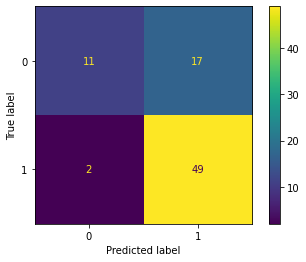

In [34]:
plot_confusion_matrix(logreg, X_test, y_test)
plt.show() 

**2) Decision Tree**

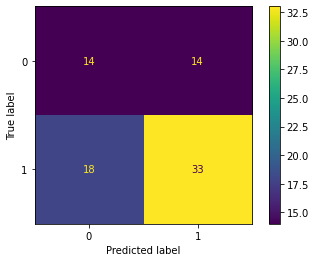

In [35]:
plot_confusion_matrix(decision, X_test, y_test)

**3) Support Vector Machine**

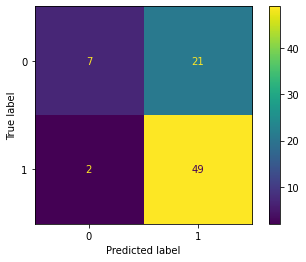

In [36]:
plot_confusion_matrix(sv, X_test, y_test)

**4) Random Forest**

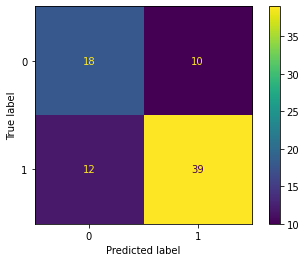

In [37]:
plot_confusion_matrix(forest, X_test, y_test)

**5) Gradient Boosting Classifier**

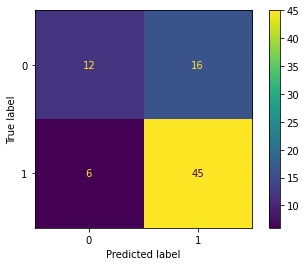

In [38]:
plot_confusion_matrix(gradient, X_test, y_test)

**6) Naive Bayes**

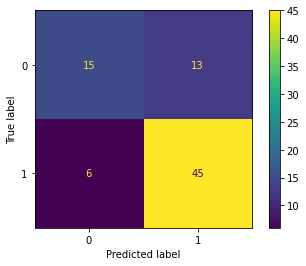

In [39]:
plot_confusion_matrix(nb, X_test, y_test)

**7) KNN**

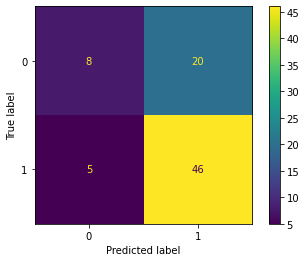

In [40]:
plot_confusion_matrix(knn, X_test, y_test)